# Tutorial: Análisis y Preparación de Datos con Python en Jupyter Notebook

En este tutorial de 1 hora, cubriremos las técnicas esenciales para la preparación de datos, desde la exploración inicial hasta la transformación avanzada de variables. Aprenderás a limpiar, imputar y hacer engineering de datos para preparar un conjunto de datos para el análisis o el modelado.

## Introducción y Configuración del Entorno

In [31]:
# Importamos las librerías principales de Python para ciencia de datos
!pip install upsetplot
!pip install matplotlib-venn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from upsetplot import from_indicators, UpSet
from matplotlib_venn import venn2, venn3

# Configuramos el estilo de los gráficos para una visualización más profesional
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
plt.rcParams['figure.figsize'] = [12, 8]  # Aumentamos el tamaño por defecto
plt.rcParams['figure.dpi'] = 120          # Aumentamos la resolución
pd.options.display.float_format = '{:,.2f}'.format # Formato de decimales

print("Librerías importadas y configuraciones aplicadas. ¡Estamos listos para empezar!")


Librerías importadas y configuraciones aplicadas. ¡Estamos listos para empezar!


## Carga de Datos (Fase ETL: Extracción)
En este paso, cargaremos nuestro conjunto de datos. En un caso real, esto sería a través de un archivo CSV o de una base de datos. Para este tutorial, crearemos un DataFrame de ejemplo para que puedas seguir el proceso sin necesidad de un archivo externo.

In [32]:
# Creamos un DataFrame de ejemplo con datos faltantes y valores atípicos
data = {'edad': [25, 30, 35, 40, 45, 120, 32, 28, 50, 60, 25, 38, 42],
        'salario': [50000, 60000, 75000, 80000, 90000, 150000, 70000, 55000, 100000, 120000, 50000, np.nan, 85000],
        'ciudad': ['A', 'B', 'A', 'C', 'B', 'A', 'C', 'B', 'A', 'C', 'B', 'A', 'B'],
        'experiencia_anios': [2, 5, 8, 10, 15, 5, 6, 3, 20, 25, 2, 9, 12],
        'nps_score': [9, 8, 10, 7, 9, 1, 8, 9, 10, 7, 8, np.nan, 9]}
df = pd.DataFrame(data)

print("Datos de ejemplo cargados. Las primeras 5 filas son:")
print(df.head())
print("Datos de ejemplo cargados. Las ultimas 5 filas son:")
print(df.tail())
print("\nLa forma de nuestro DataFrame es (filas, columnas):", df.shape)

Datos de ejemplo cargados. Las primeras 5 filas son:
   edad   salario ciudad  experiencia_anios  nps_score
0    25 50,000.00      A                  2       9.00
1    30 60,000.00      B                  5       8.00
2    35 75,000.00      A                  8      10.00
3    40 80,000.00      C                 10       7.00
4    45 90,000.00      B                 15       9.00
Datos de ejemplo cargados. Las ultimas 5 filas son:
    edad    salario ciudad  experiencia_anios  nps_score
8     50 100,000.00      A                 20      10.00
9     60 120,000.00      C                 25       7.00
10    25  50,000.00      B                  2       8.00
11    38        NaN      A                  9        NaN
12    42  85,000.00      B                 12       9.00

La forma de nuestro DataFrame es (filas, columnas): (13, 5)


## Exploración Inicial de Datos (Fase ETL: Transformación)
Esta es la fase de diagnóstico. El objetivo es obtener una visión general de la calidad y la estructura de nuestros datos antes de realizar cualquier limpieza.

--- Información General del DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   edad               13 non-null     int64  
 1   salario            12 non-null     float64
 2   ciudad             13 non-null     object 
 3   experiencia_anios  13 non-null     int64  
 4   nps_score          12 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 652.0+ bytes

--- Resumen Estadístico de Variables Numéricas ---
                   count      mean       std       min       25%       50%  \
edad               13.00     43.85     25.04     25.00     30.00     38.00   
salario            12.00 82,083.33 30,034.70 50,000.00 58,750.00 77,500.00   
experiencia_anios  13.00      9.38      7.05      2.00      5.00      8.00   
nps_score          12.00      7.92      2.39      1.00      7.75      8.50   

          

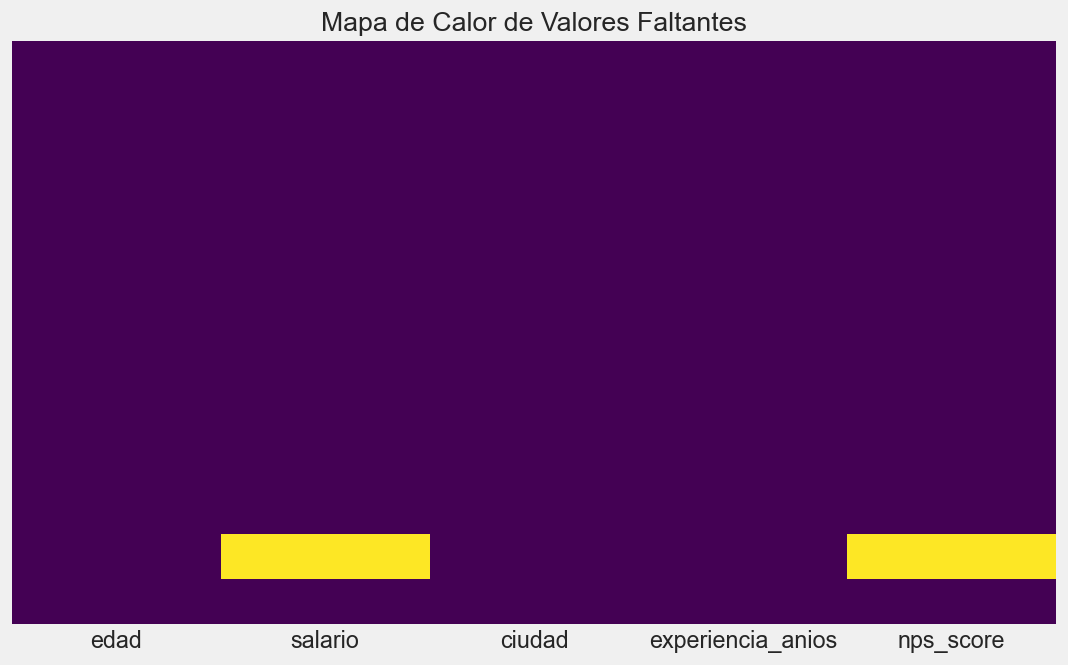

In [33]:
# 1. Información del DataFrame: Verificamos los tipos de datos y los valores no nulos
print("--- Información General del DataFrame ---")
df.info()

# 2. Resumen estadístico: Obtener una visión rápida de la distribución de las variables numéricas
print("\n--- Resumen Estadístico de Variables Numéricas ---")
print(df.describe().T) # La 'T' (transponer) mejora la legibilidad

# 3. Conteo de valores faltantes
print("\n--- Conteo de Valores Faltantes por Columna ---")
print(df.isnull().sum())

# 4. Visualización de valores faltantes: Un heatmap es muy útil para identificar patrones
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Mapa de Calor de Valores Faltantes', fontsize=16)
plt.show()

## Detección y Tratamiento de Valores Atípicos (Outliers)
Un valor atípico es una observación que está muy distante de otras. Pueden ser errores de entrada o valores reales pero extremos. Un boxplot es la herramienta visual más efectiva para detectarlos.

--- Visualización de Outliers con Boxplots ---


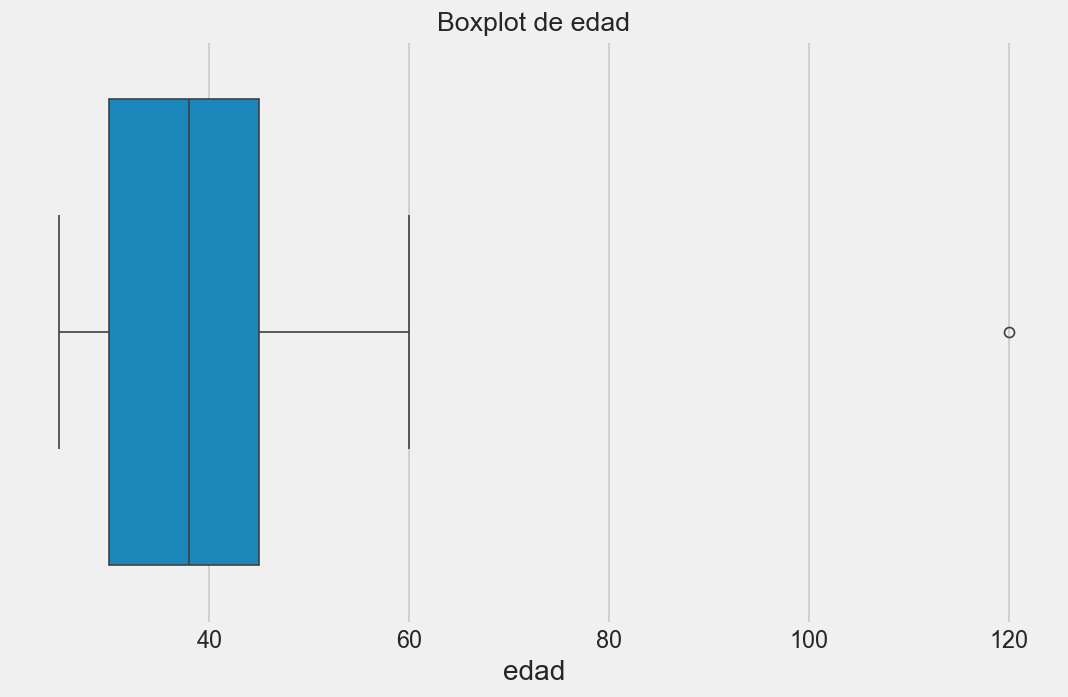

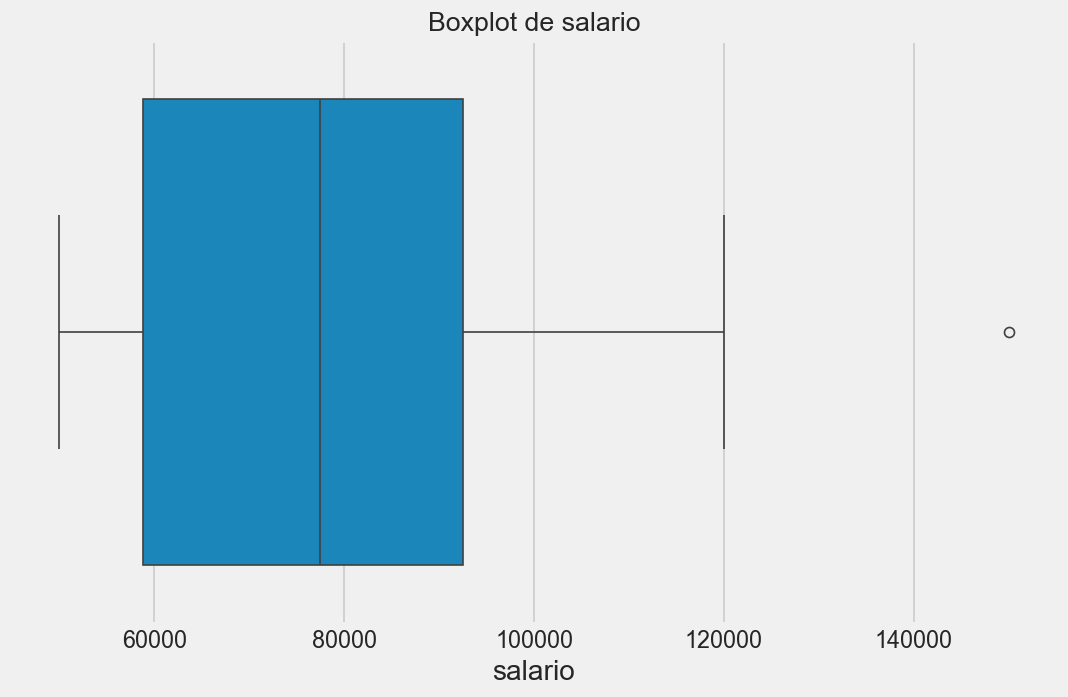

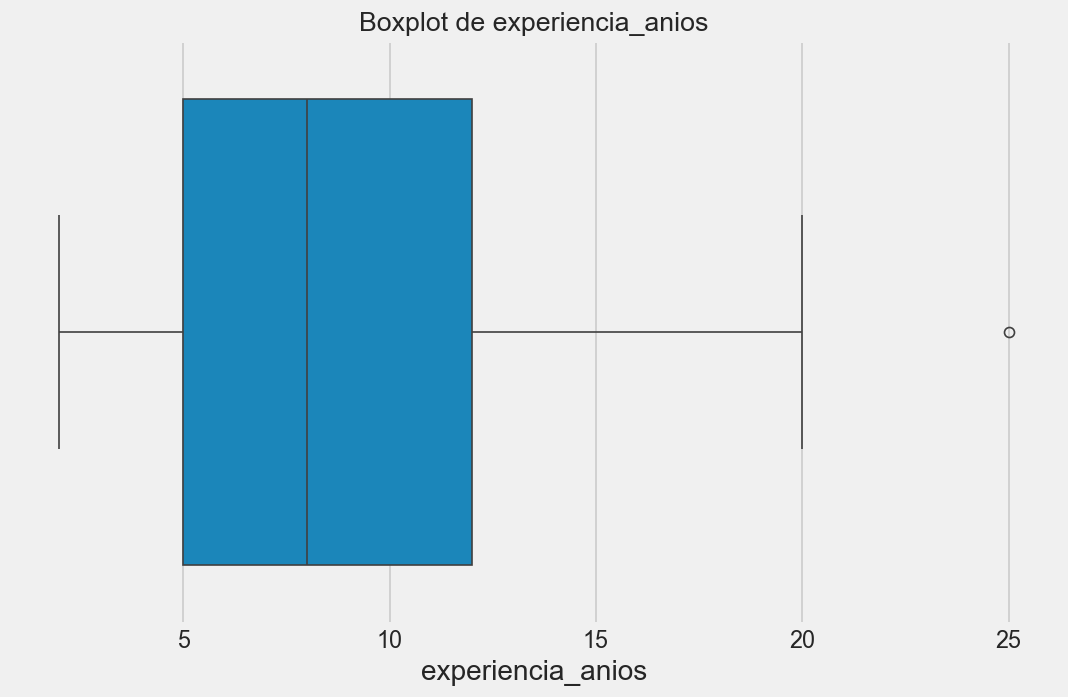

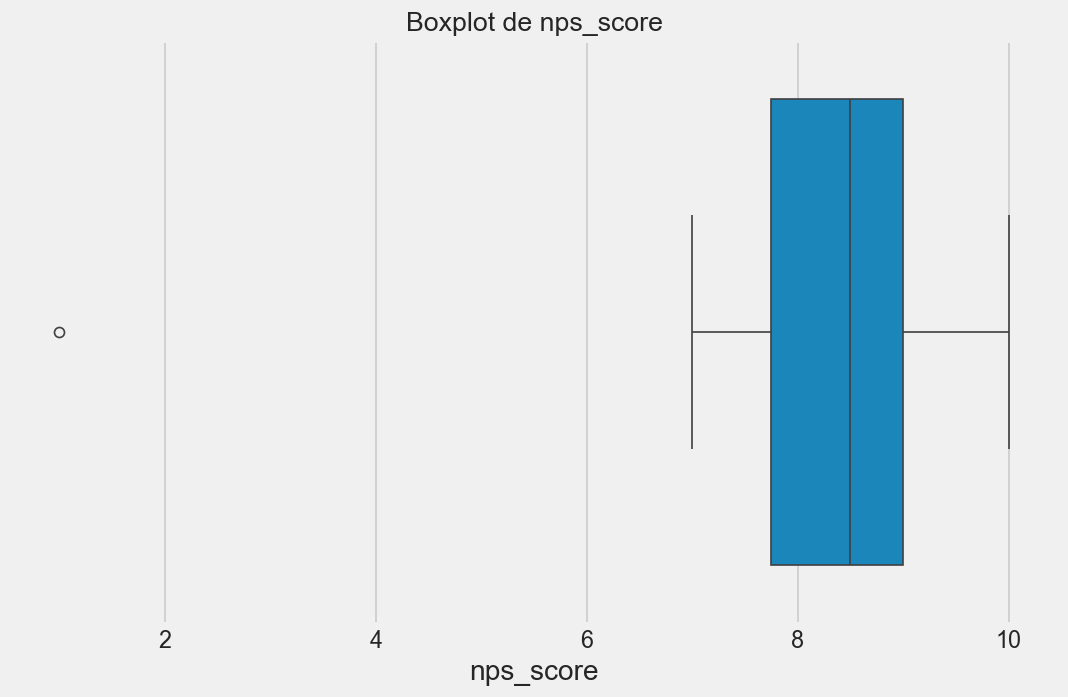


DataFrame después de corregir el outlier de 'edad':
    edad    salario ciudad  experiencia_anios  nps_score
0  25.00  50,000.00      A                  2       9.00
1  30.00  60,000.00      B                  5       8.00
2  35.00  75,000.00      A                  8      10.00
3  40.00  80,000.00      C                 10       7.00
4  45.00  90,000.00      B                 15       9.00
5  38.00 150,000.00      A                  5       1.00
6  32.00  70,000.00      C                  6       8.00
7  28.00  55,000.00      B                  3       9.00
8  50.00 100,000.00      A                 20      10.00
9  60.00 120,000.00      C                 25       7.00
10 25.00  50,000.00      B                  2       8.00
11 38.00        NaN      A                  9        NaN
12 42.00  85,000.00      B                 12       9.00


In [34]:
# Visualización de outliers con boxplots
print("--- Visualización de Outliers con Boxplots ---")
numerical_cols = ['edad', 'salario', 'experiencia_anios', 'nps_score']
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}', fontsize=16)
    plt.xlabel(col)
    plt.show()

# Discutimos la estrategia para cada outlier:
# - 'edad': El valor 120 es claramente un error. Lo reemplazaremos con la mediana, que es robusta a los outliers.
# - 'salario': El salario de 150,000 podría ser un caso especial o un error. Para este caso lo dejaremos.
# - 'nps_score': El valor 1 es un puntaje bajo, pero es un valor válido. No es un error.

# Corregir el outlier de la edad
median_age = df['edad'].median()
df['edad'] = np.where(df['edad'] > 100, median_age, df['edad'])
print("\nDataFrame después de corregir el outlier de 'edad':")
print(df)


## Estrategias de Imputación de Datos Faltantes
La imputación es el proceso de reemplazar los valores faltantes. La estrategia que elijamos dependerá del tipo de datos y de la cantidad de valores faltantes.

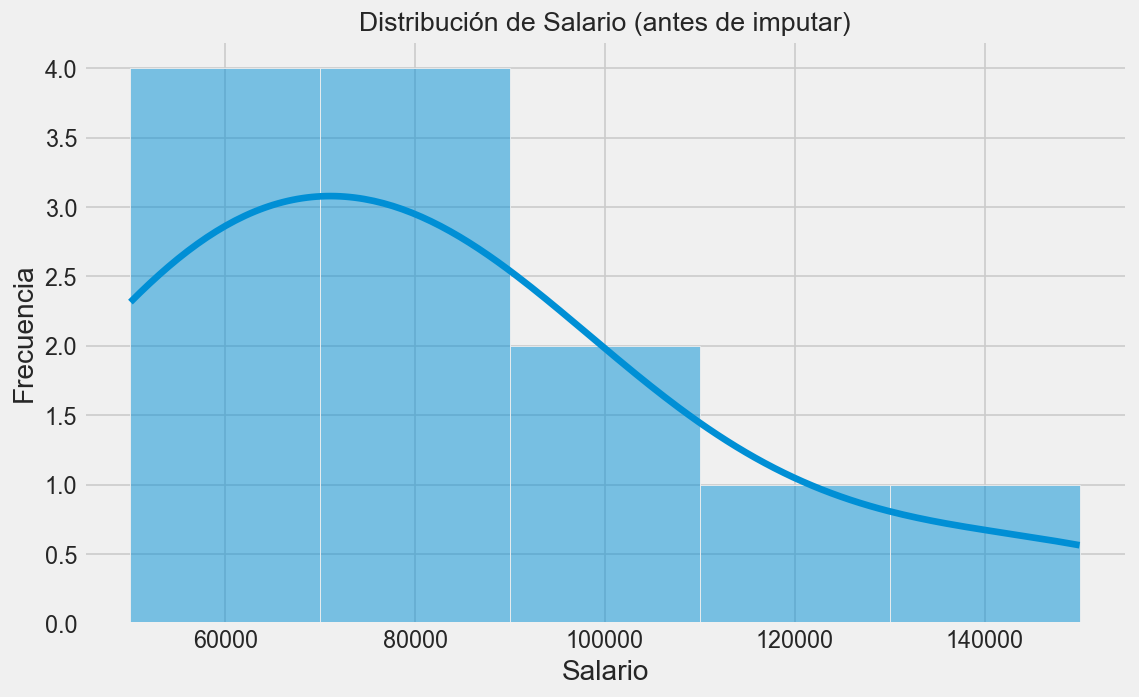

Valores faltantes después de la imputación:
edad                 0
salario              0
ciudad               0
experiencia_anios    0
nps_score            0
dtype: int64

DataFrame con los valores faltantes imputados:
    edad    salario ciudad  experiencia_anios  nps_score
0  25.00  50,000.00      A                  2       9.00
1  30.00  60,000.00      B                  5       8.00
2  35.00  75,000.00      A                  8      10.00
3  40.00  80,000.00      C                 10       7.00
4  45.00  90,000.00      B                 15       9.00
5  38.00 150,000.00      A                  5       1.00
6  32.00  70,000.00      C                  6       8.00
7  28.00  55,000.00      B                  3       9.00
8  50.00 100,000.00      A                 20      10.00
9  60.00 120,000.00      C                 25       7.00
10 25.00  50,000.00      B                  2       8.00
11 38.00  77,500.00      A                  9       7.92
12 42.00  85,000.00      B             

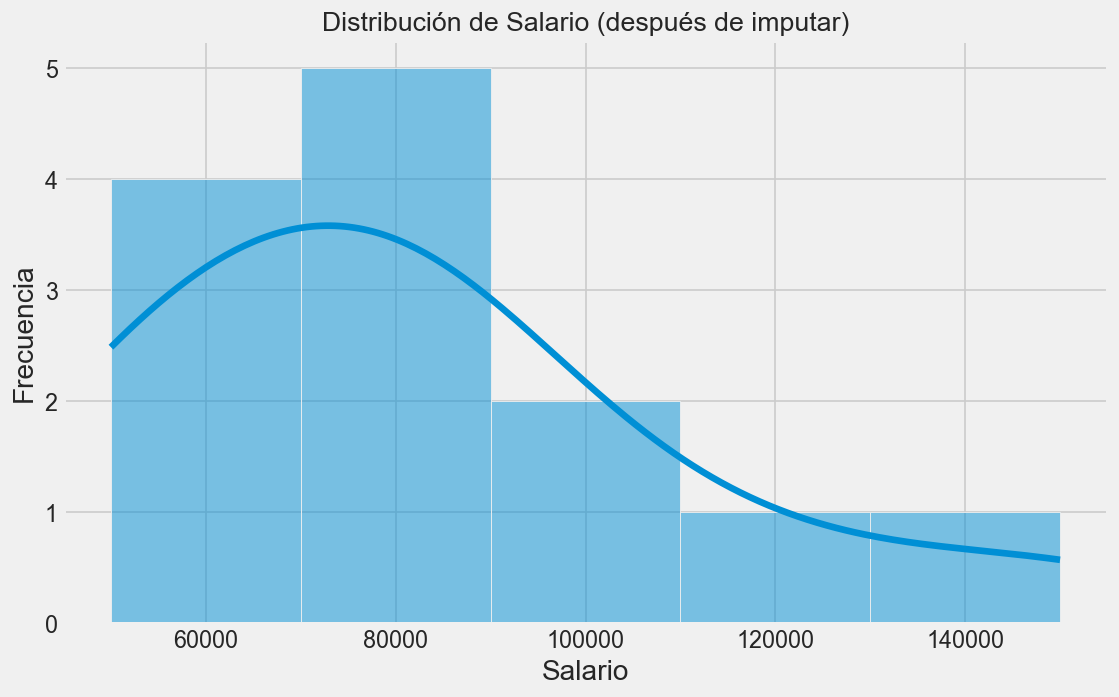

In [35]:
# Visualizar la distribución de 'salario' antes de la imputación
plt.figure(figsize=(10, 6))
sns.histplot(df['salario'], kde=True)
plt.title('Distribución de Salario (antes de imputar)', fontsize=16)
plt.xlabel('Salario')
plt.ylabel('Frecuencia')
plt.show()

# 1. Imputación por mediana para 'salario'
# La mediana es una opción segura porque no se ve afectada por los outliers
median_salary = df['salario'].median()
df['salario'] = df['salario'].fillna(median_salary)

# 2. Imputación por media para 'nps_score'
# Usamos la media porque no hay outliers significativos en esta variable
mean_nps = df['nps_score'].mean()
df['nps_score'] = df['nps_score'].fillna(mean_nps)

print("Valores faltantes después de la imputación:")
print(df.isnull().sum())
print("\nDataFrame con los valores faltantes imputados:")
print(df)

# Visualizar la distribución de 'salario' después de la imputación
plt.figure(figsize=(10, 6))
sns.histplot(df['salario'], kde=True)
plt.title('Distribución de Salario (después de imputar)', fontsize=16)
plt.xlabel('Salario')
plt.ylabel('Frecuencia')
plt.show()

## Transformación y Feature Engineering
El Feature Engineering es el proceso de crear nuevas variables a partir de las existentes. Es una parte crucial del proceso y a menudo la que más valor añade a un modelo.

In [36]:
# 1. Creación de una variable de razón: 'salario_por_anio'
df['salario_por_anio'] = df['salario'] / (df['experiencia_anios'] + 1)
print("Nueva variable 'salario_por_anio' creada:")
print(df[['salario', 'experiencia_anios', 'salario_por_anio']].head())

# 2. Creación de una variable categórica a partir de una numérica
# Dividimos la 'experiencia_anios' en 3 grupos: Junior, Mid y Senior
df['nivel_experiencia'] = pd.cut(df['experiencia_anios'], 
                                 bins=[0, 5, 15, np.inf], 
                                 labels=['Junior', 'Mid', 'Senior'])
print("\nNueva variable categórica 'nivel_experiencia' creada:")
print(df[['experiencia_anios', 'nivel_experiencia']].head())

# 3. Transformación de variables categóricas a numéricas: One-Hot Encoding
# Convertimos la columna 'ciudad' y 'nivel_experiencia' en variables numéricas binarias
df_encoded = pd.get_dummies(df, columns=['ciudad', 'nivel_experiencia'], drop_first=True)
print("\nDataFrame después de aplicar One-Hot Encoding:")
print(df_encoded)


Nueva variable 'salario_por_anio' creada:
    salario  experiencia_anios  salario_por_anio
0 50,000.00                  2         16,666.67
1 60,000.00                  5         10,000.00
2 75,000.00                  8          8,333.33
3 80,000.00                 10          7,272.73
4 90,000.00                 15          5,625.00

Nueva variable categórica 'nivel_experiencia' creada:
   experiencia_anios nivel_experiencia
0                  2            Junior
1                  5            Junior
2                  8               Mid
3                 10               Mid
4                 15               Mid

DataFrame después de aplicar One-Hot Encoding:
    edad    salario  experiencia_anios  nps_score  salario_por_anio  ciudad_B  \
0  25.00  50,000.00                  2       9.00         16,666.67     False   
1  30.00  60,000.00                  5       8.00         10,000.00      True   
2  35.00  75,000.00                  8      10.00          8,333.33     False   
3  

### Creación de Variables Categóricas a partir de Fechas y Números
El feature engineering no se limita a crear ratios. Podemos extraer información de cualquier tipo de dato, como fechas, para generar nuevas variables que pueden ser muy útiles para los modelos.

In [37]:
# Suponemos que tenemos una columna de fecha de contratación
df['fecha_contratacion'] = pd.to_datetime(['2020-01-15', '2018-05-20', '2019-09-10', '2017-03-01',
                                          '2021-08-01', '2016-11-22', '2020-04-18', '2019-12-05',
                                          '2015-02-14', '2014-06-30', '2020-07-25', '2018-01-01', '2019-03-10'])

# 1. Extracción de variables de tiempo
# Creamos una variable 'anio_contratacion'
df['anio_contratacion'] = df['fecha_contratacion'].dt.year

# 2. Creación de variables binarias (booleanas)
# Creamos una variable booleana que indica si el empleado es 'nuevo' (contratado en los últimos 2 años)
from datetime import datetime
today = datetime.now().year
df['es_nuevo'] = (today - df['anio_contratacion']) < 3

# 3. Discretización (Binning)
# Transformamos una variable numérica continua en una categórica discreta
# Por ejemplo, agrupamos los salarios en 3 categorías: 'Bajo', 'Medio', 'Alto'
df['rango_salario'] = pd.cut(df['salario'], 
                             bins=[0, 70000, 100000, np.inf], 
                             labels=['Bajo', 'Medio', 'Alto'])

print("Nuevas variables creadas:")
print(df[['fecha_contratacion', 'anio_contratacion', 'es_nuevo', 'salario', 'rango_salario']].head())

Nuevas variables creadas:
  fecha_contratacion  anio_contratacion  es_nuevo   salario rango_salario
0         2020-01-15               2020     False 50,000.00          Bajo
1         2018-05-20               2018     False 60,000.00          Bajo
2         2019-09-10               2019     False 75,000.00         Medio
3         2017-03-01               2017     False 80,000.00         Medio
4         2021-08-01               2021     False 90,000.00         Medio


## Visualización de los Resultados y Relaciones
Finalmente, utilizaremos visualizaciones para entender la relación entre las variables y confirmar que nuestros pasos de limpieza y transformación fueron efectivos.

#### Histograma
Un histograma muestra la distribución de una variable numérica agrupando valores en bins (intervalos). Permite detectar asimetrías, colas largas, modas múltiples y posibles outliers.
Cuándo usar:

#### Gráfico de pastel (Pie chart)
Muestra la proporción de cada categoría como segmentos de un círculo que suman 100%.

#### Gráfico de Barras 
Muestran valores discretos por categoría. Útiles para conteos (value_counts) o medias/medianas por grupo (groupby).


### Tipos de Visualizaciones Avanzadas e Interpretación
Más allá de los gráficos de barras y de dispersión, existen otras visualizaciones que nos permiten entender la distribución y las relaciones de los datos de manera más profunda.

#### Gráfico de Violín (Violin Plot)
El gráfico de violín combina un boxplot con una estimación de la densidad de probabilidad (KDE). Es ideal para visualizar la distribución de una variable numérica a través de diferentes categorías.

Interpretación:

El ancho del "violín" en cada punto de la curva indica la densidad de los datos en ese valor. Un "violín" más ancho significa que hay más observaciones en ese rango de valores.

La caja en el centro representa el rango intercuartílico (IQR) y la línea blanca es la mediana.

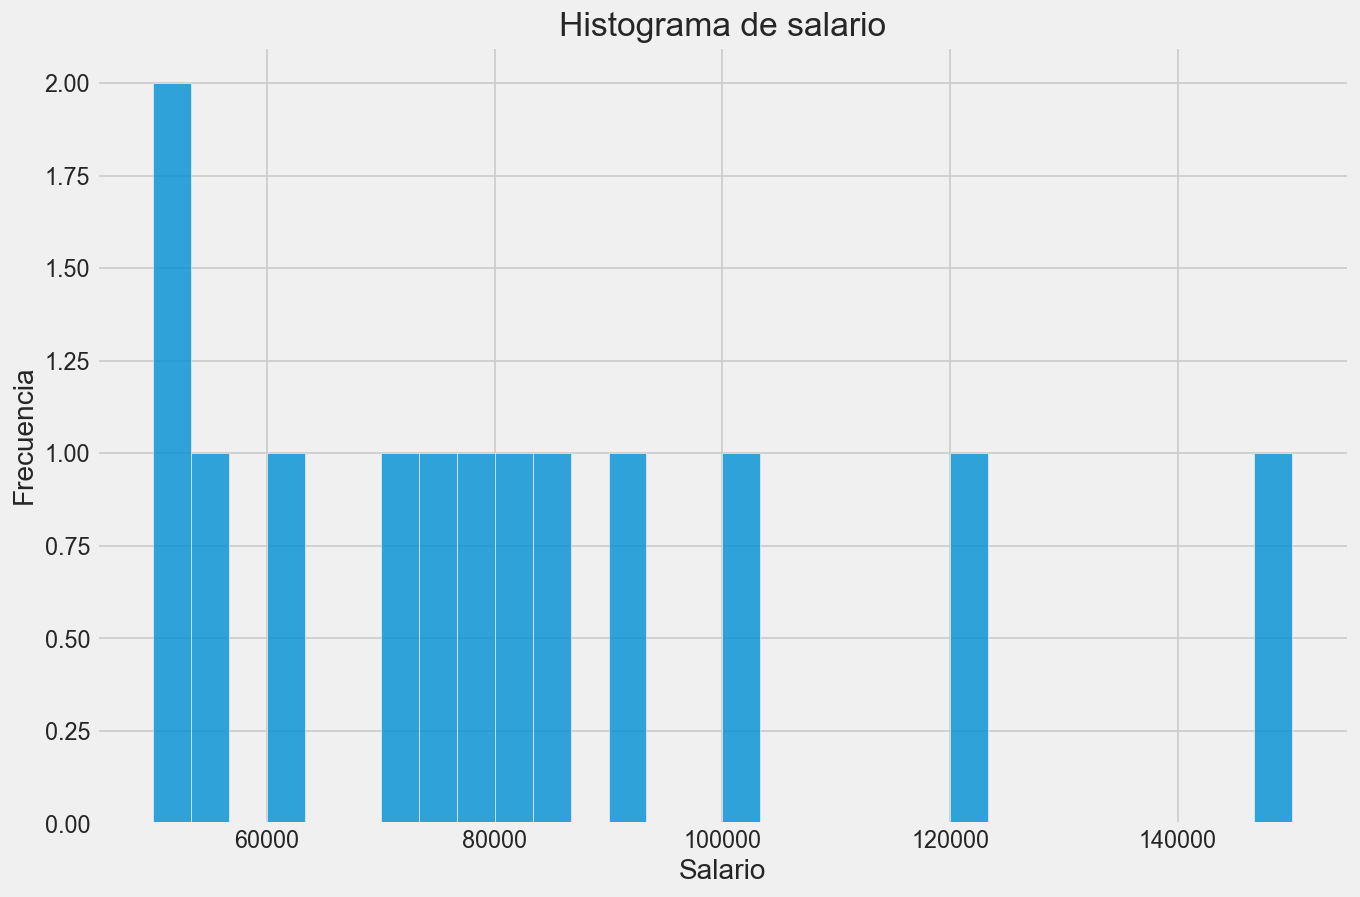

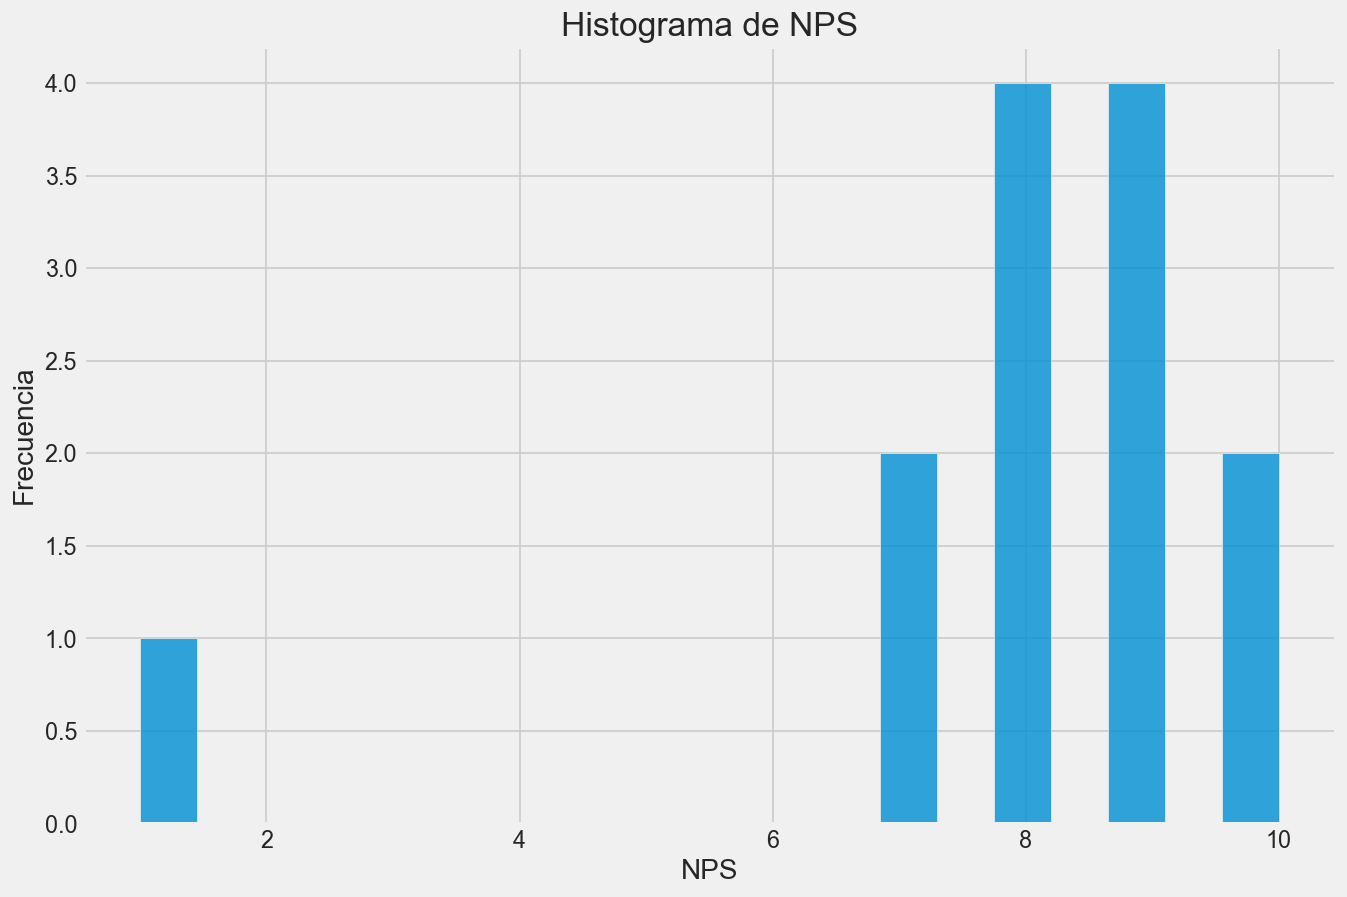

In [38]:
# Histogramas

df['salario'].plot(kind='hist', bins=30, alpha=0.8)
plt.title('Histograma de salario'); plt.xlabel('Salario'); plt.ylabel('Frecuencia'); plt.show()

df['nps_score'].dropna().plot(kind='hist', bins=20, alpha=0.8)
plt.title('Histograma de NPS'); plt.xlabel('NPS'); plt.ylabel('Frecuencia'); plt.show()

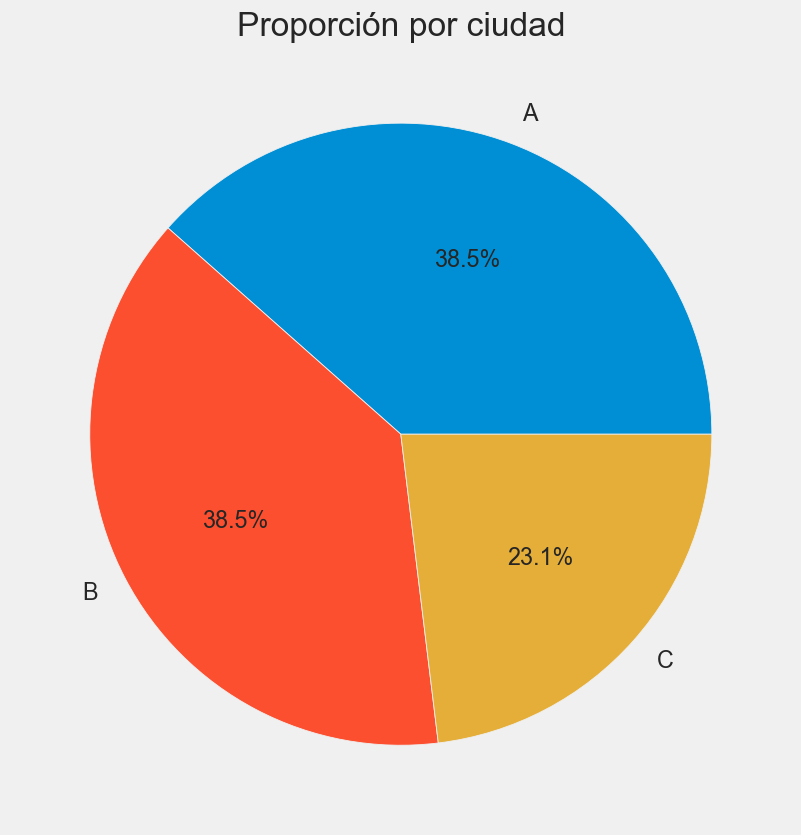

In [39]:
# Gráfico de Pie chart

shares = df['ciudad'].value_counts(normalize=True)
shares.plot(kind='pie', autopct='%1.1f%%', ylabel='')
plt.title('Proporción por ciudad'); plt.show()


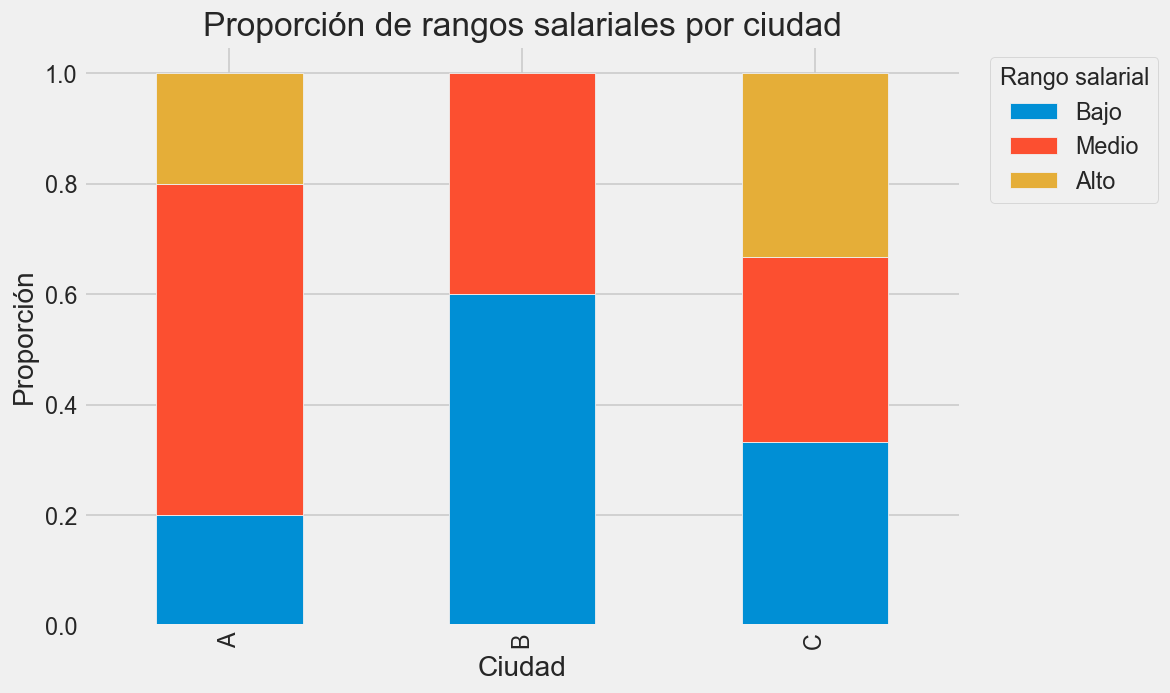

In [40]:
# Gráfico de barras apilada

# Proporciones por fila ya normalizadas (cada ciudad suma 1)
pivot = pd.crosstab(df['ciudad'], df['rango_salario'], normalize='index').fillna(0)

ax = pivot.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_ylabel('Proporción')
ax.set_xlabel('Ciudad')
ax.set_title('Proporción de rangos salariales por ciudad')
ax.legend(title='Rango salarial', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


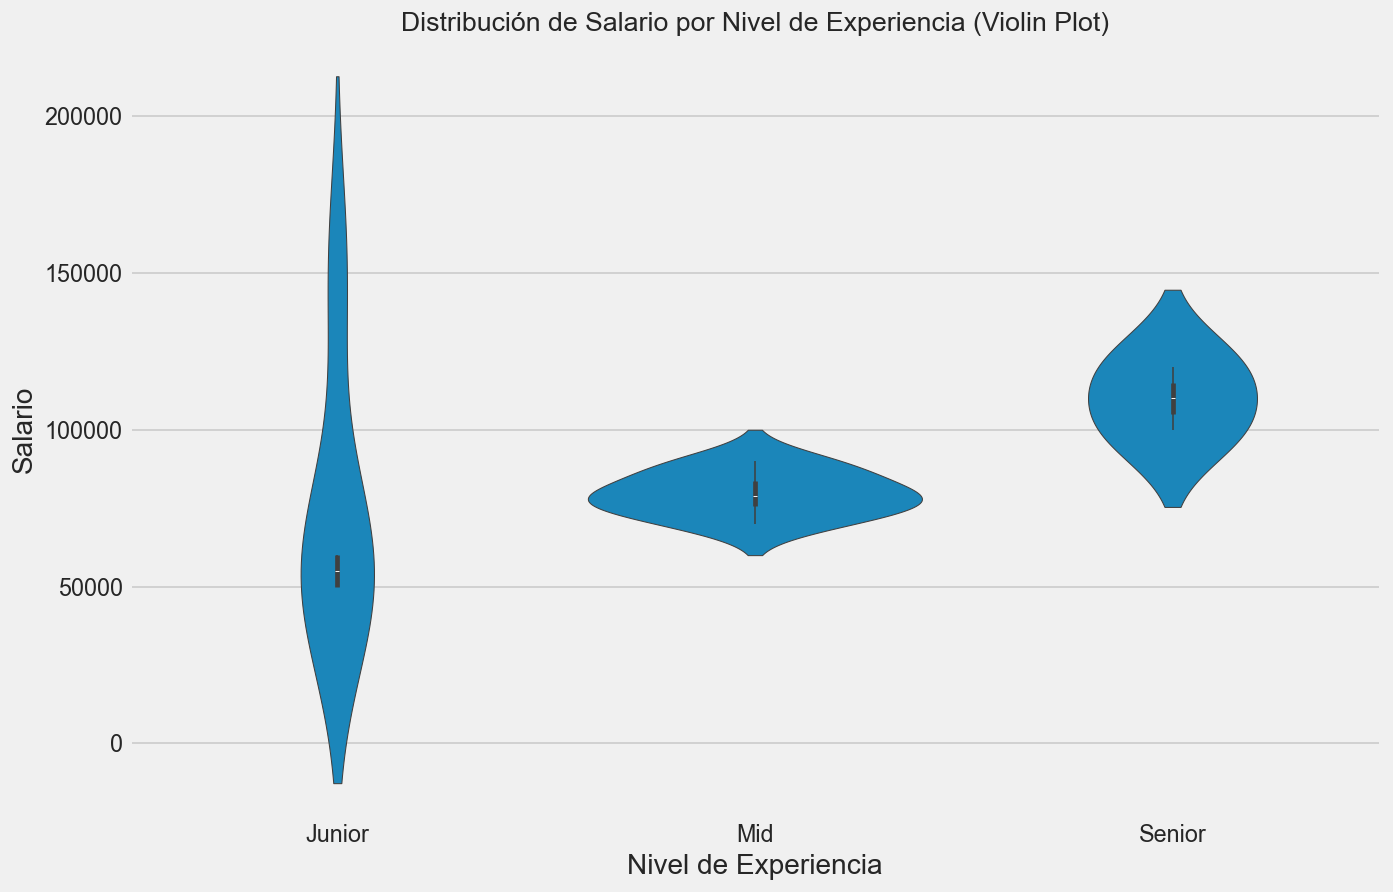

In [41]:
# Gráfico de violín: Distribución del salario por 'nivel_experiencia'
plt.figure(figsize=(12, 8))
sns.violinplot(x='nivel_experiencia', y='salario', data=df)
plt.title('Distribución de Salario por Nivel de Experiencia (Violin Plot)', fontsize=16)
plt.xlabel('Nivel de Experiencia')
plt.ylabel('Salario')
plt.show()

# Interpretación: Podemos ver que el salario de los 'Senior' tiene una distribución más amplia (mayor varianza)
# con una mediana más alta, mientras que la mayoría de los 'Junior' se concentran en un rango de salarios más bajo.

#### Gráfico de Pares (Pair Plot)

Un pairplot de Seaborn es una matriz de gráficos de dispersión que muestra la relación entre cada par de variables en el DataFrame. Es una excelente herramienta para una exploración rápida.

Interpretación:

En la diagonal: Se muestran histogramas o gráficos de densidad para cada variable individual. Esto nos ayuda a entender su distribución.

Fuera de la diagonal: Se muestran diagramas de dispersión entre cada par de variables. Esto nos permite detectar visualmente correlaciones, patrones y clusters (agrupaciones).

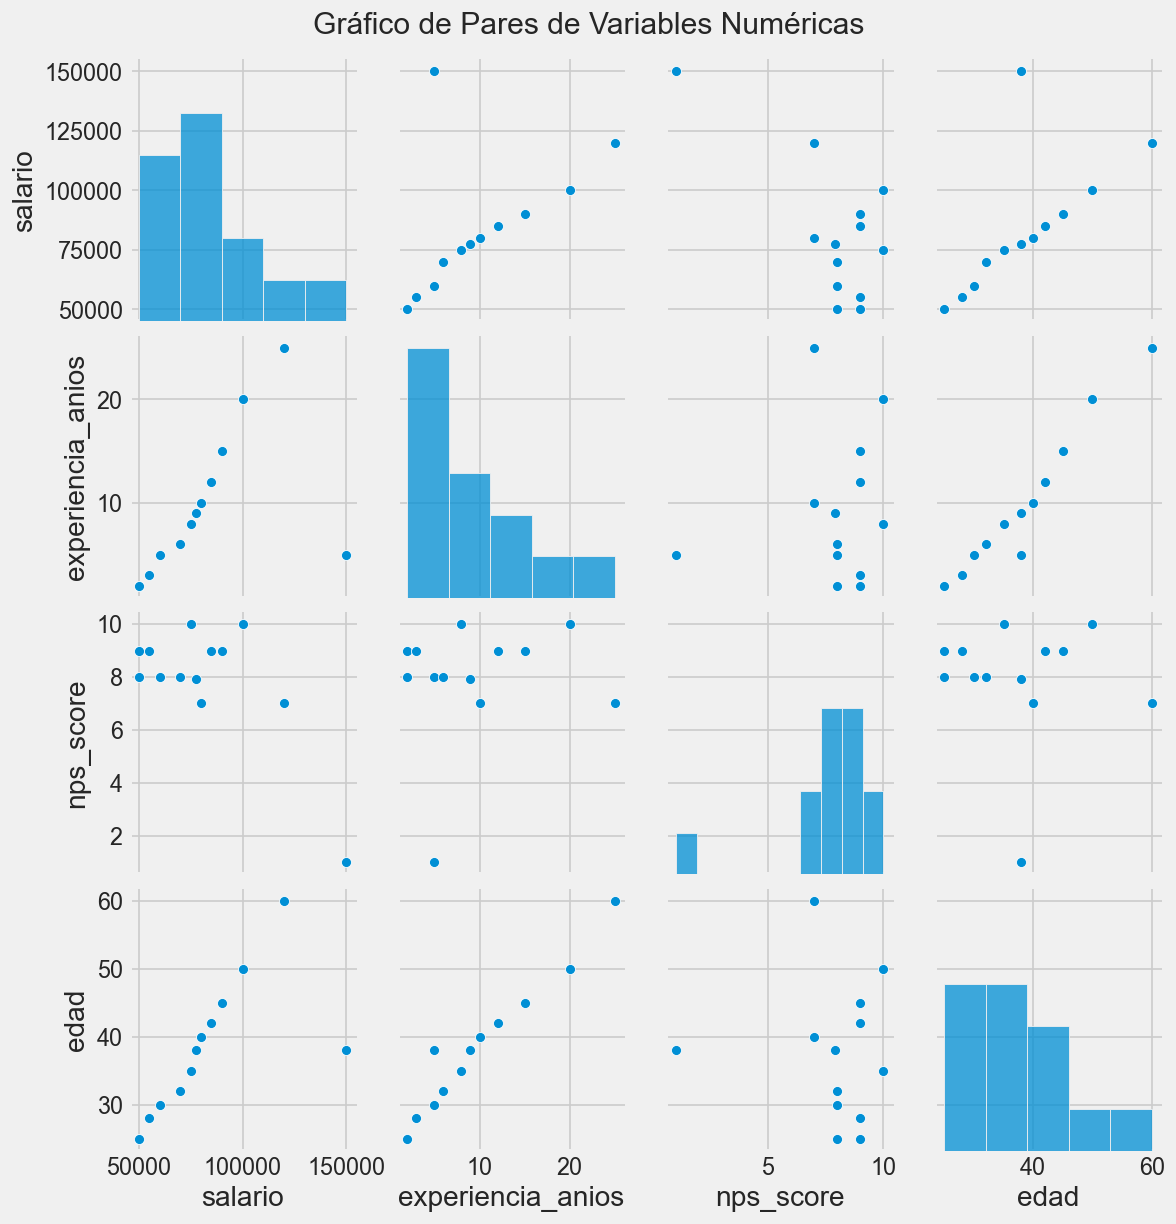

In [42]:
# Seleccionamos solo las columnas numéricas para el pair plot
sns.pairplot(df[['salario', 'experiencia_anios', 'nps_score', 'edad']])
plt.suptitle('Gráfico de Pares de Variables Numéricas', y=1.02, fontsize=18)
plt.show()

# Interpretación: Observa la relación entre 'salario' y 'experiencia_anios'.
# El gráfico de dispersión muestra una clara tendencia positiva: a medida que aumentan los años de experiencia,
# el salario también tiende a aumentar. Los histogramas en la diagonal nos muestran la distribución
# de cada una de estas variables.

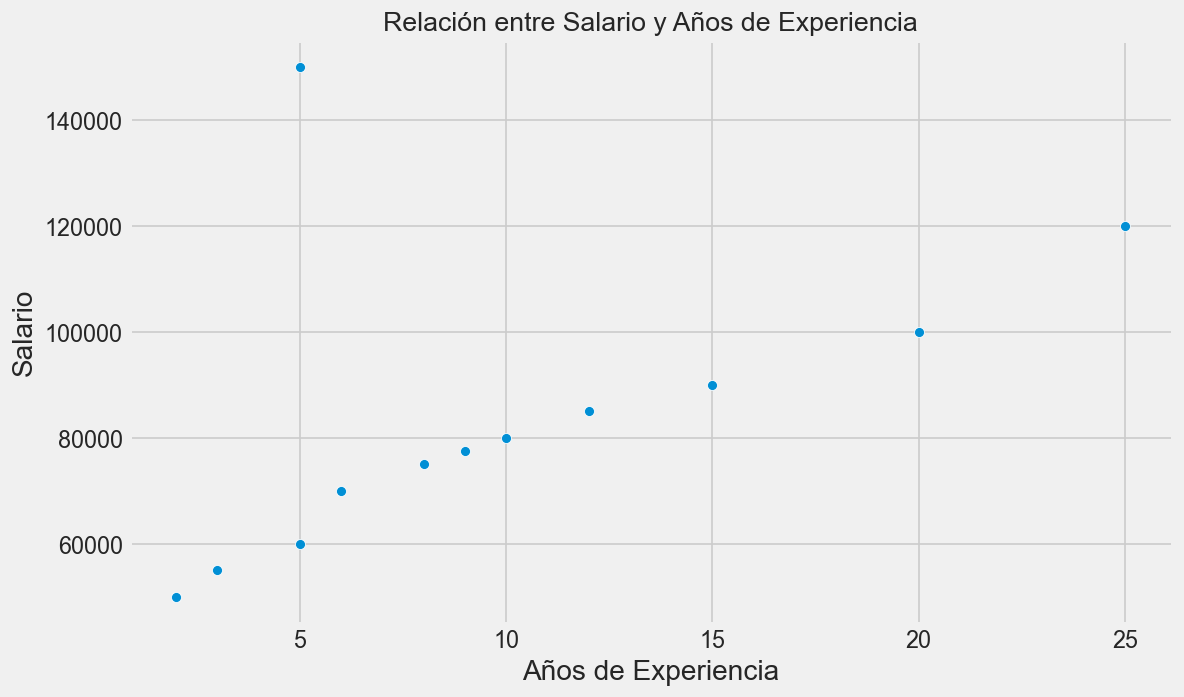

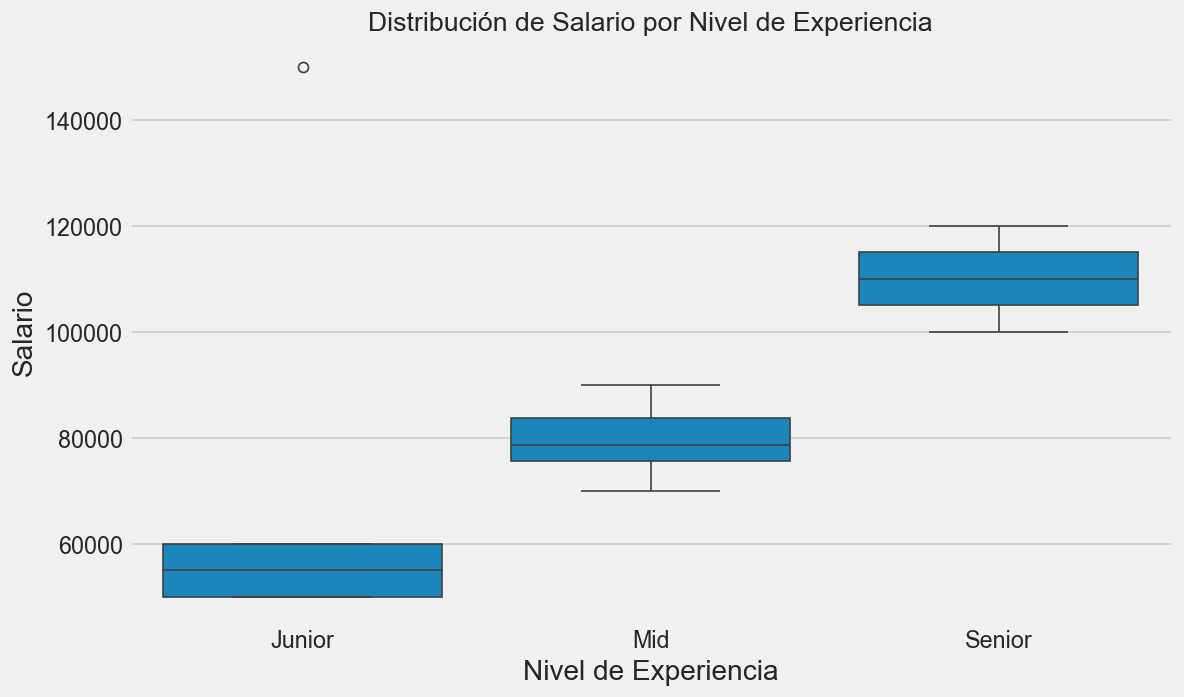

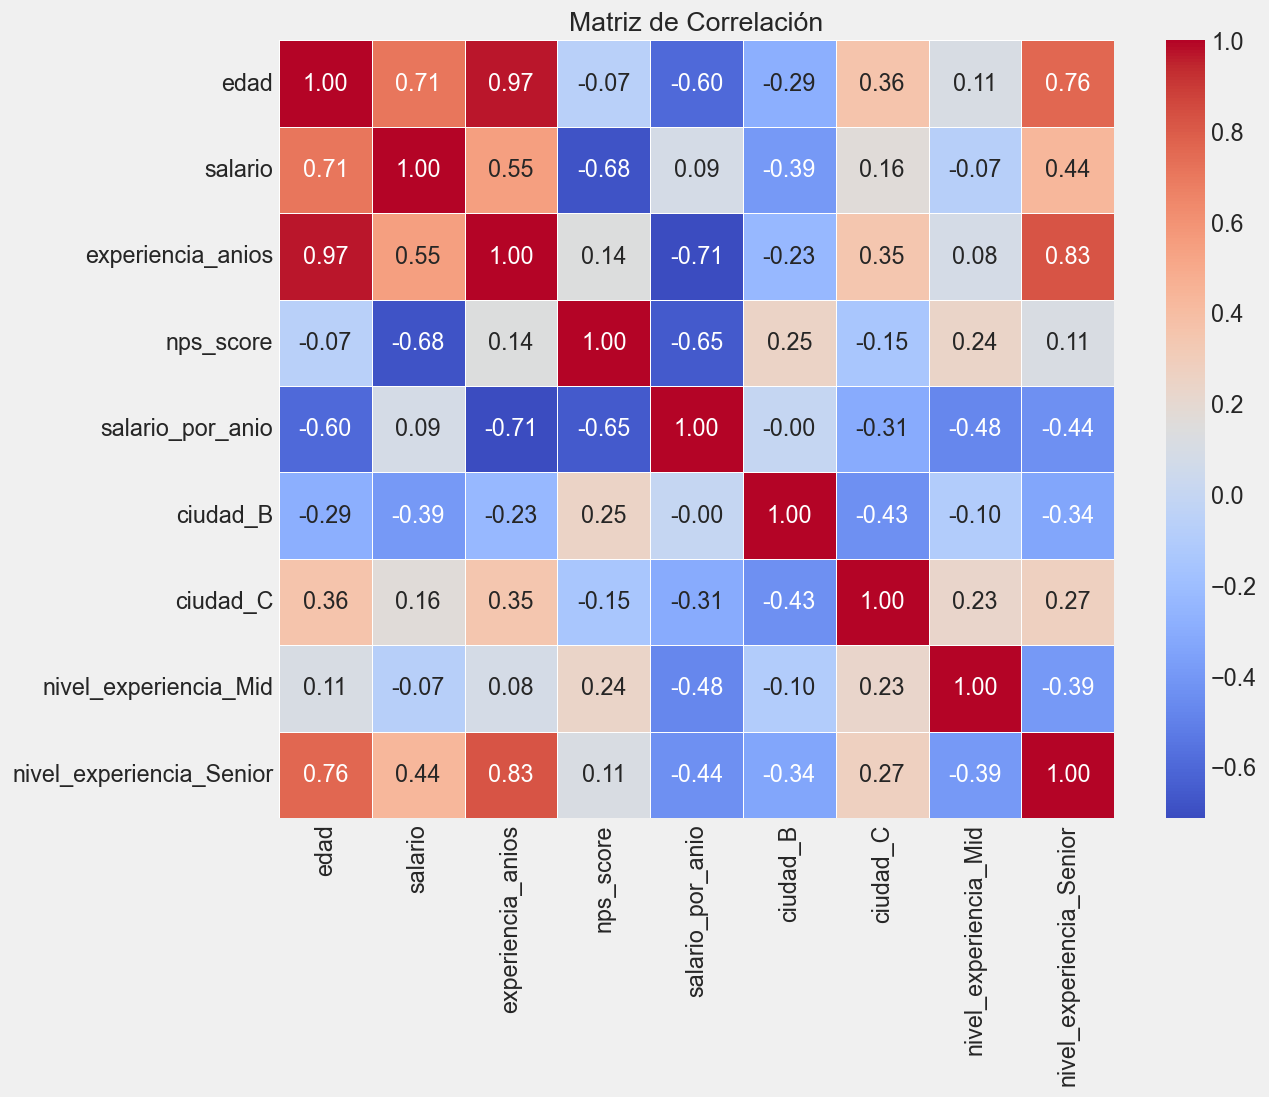

In [43]:
# 1. Diagrama de dispersión (Scatter Plot): Relación entre salario y experiencia
plt.figure(figsize=(10, 6))
sns.scatterplot(x='experiencia_anios', y='salario', data=df)
plt.title('Relación entre Salario y Años de Experiencia', fontsize=16)
plt.xlabel('Años de Experiencia')
plt.ylabel('Salario')
plt.show()

# 2. Boxplot: Distribución del salario por el nuevo nivel de experiencia
plt.figure(figsize=(10, 6))
sns.boxplot(x='nivel_experiencia', y='salario', data=df)
plt.title('Distribución de Salario por Nivel de Experiencia', fontsize=16)
plt.xlabel('Nivel de Experiencia')
plt.ylabel('Salario')
plt.show()

# 3. Matriz de correlación: Entender las relaciones entre todas las variables numéricas
correlation_matrix = df_encoded.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación', fontsize=16)
plt.show()

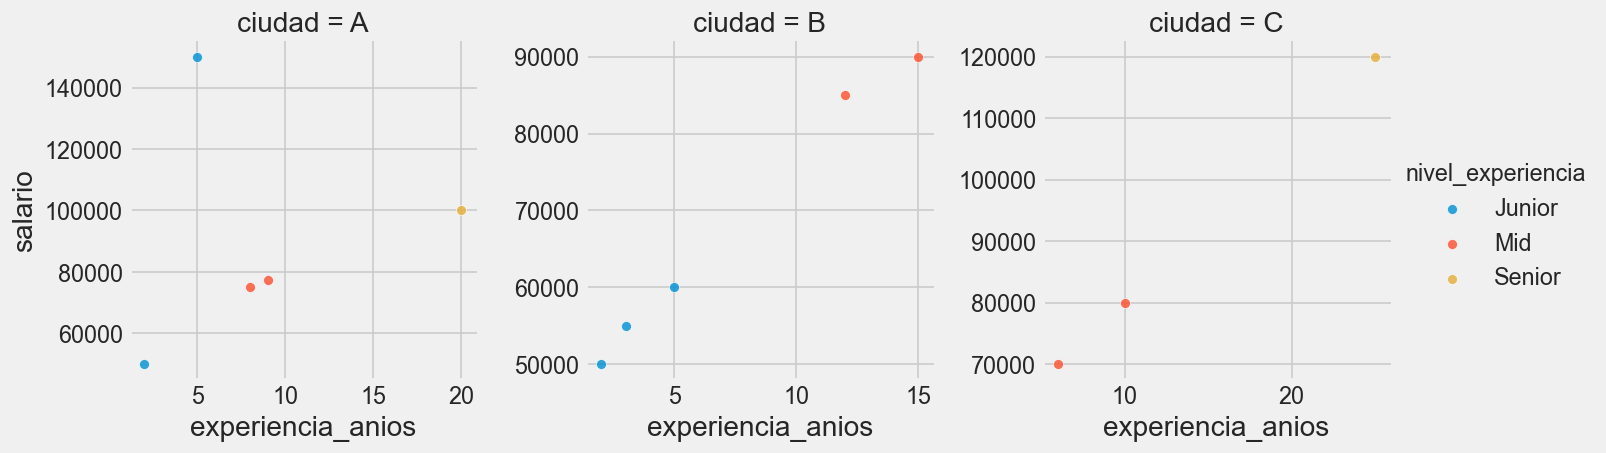

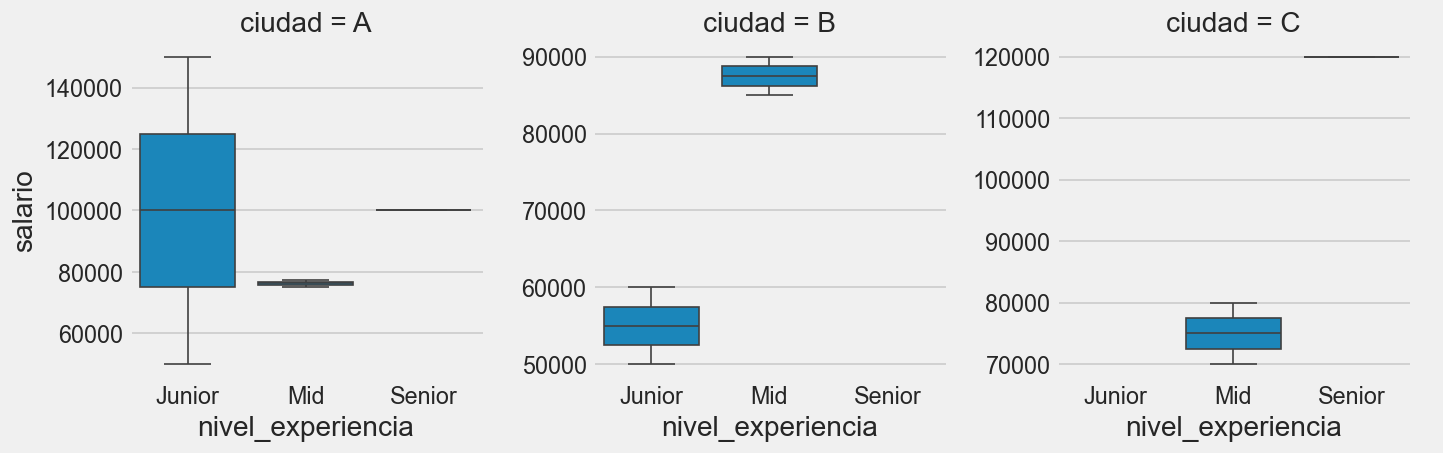

In [44]:
# Scatter faceteado por ciudad, coloreado por nivel
g = sns.FacetGrid(df, col='ciudad', hue='nivel_experiencia', col_wrap=3, sharex=False, sharey=False, height=4)
g.map_dataframe(sns.scatterplot, x='experiencia_anios', y='salario', alpha=0.8)
g.add_legend()
plt.show()

# Boxplots por ciudad (mismo eje x)
sns.catplot(data=df, x='nivel_experiencia', y='salario', col='ciudad', kind='box', sharey=False, height=4)
plt.show()


#### Diagrama de venn
Un diagrama de Venn visualiza las intersecciones entre 2 o 3 conjuntos. Cada círculo representa un conjunto. Las zonas superpuestas muestran cuántas filas pertenecen a varios conjuntos a la vez (intersecciones)

Interpretación

- Zonas exclusivas (solo un círculo): número de filas que cumplen solo esa condición 
- Zonas de solapamiento (A ∩ B, A ∩ C, B ∩ C): filas que cumplen exactamente esas dos condiciones simultáneamente.
- Zona central (A ∩ B ∩ C): filas que cumplen las tres condiciones a la vez.
- Suma de regiones: corresponde a las filas que pertenecen a al menos uno de los conjuntos elegidos (las que no cumplen ninguna de las tres condiciones no aparecen en el diagrama).

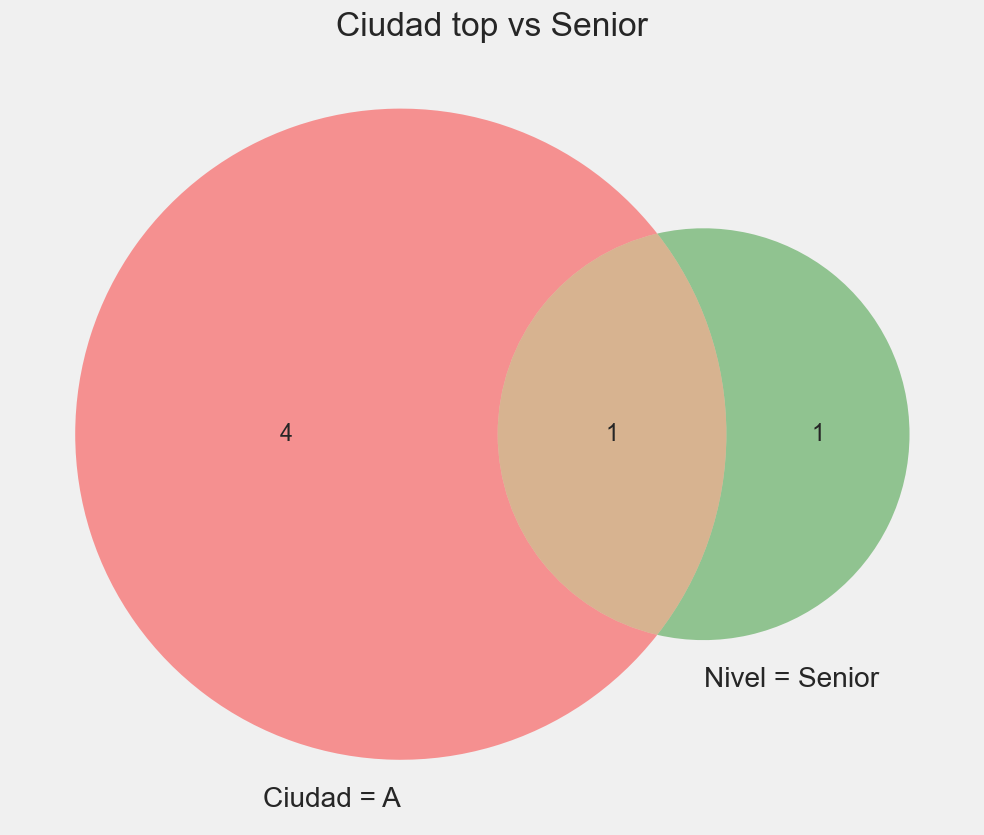

In [45]:
# Elegimos una categoría por variable (ejemplo reproducible)
top_city = df['ciudad'].value_counts().index[0]  # ciudad más frecuente
set_A = (df['ciudad'] == top_city)
set_B = (df['nivel_experiencia'] == 'Senior')

plt.figure()
venn2(
    subsets=(
        (set_A & ~set_B).sum(),   # A solo
        (set_B & ~set_A).sum(),   # B solo
        (set_A & set_B).sum()     # A ∩ B
    ),
    set_labels=(f'Ciudad = {top_city}', 'Nivel = Senior')
)
plt.title('Ciudad top vs Senior')
plt.show()


#### Upset

Es una alternativa a los diagramas de Venn para analizar intersecciones entre conjuntos (categorías). Escala bien cuando hay muchas categorías y muestra con barras cuántas filas cumplen una combinación específica.

Interpretación:
- Barras superiores (Intersection size): altura = número de filas que pertenecen simultáneamente a todas las categorías marcadas en esa columna
- Matriz de puntos (abajo): los puntos conectados indican qué categorías participan en esa intersección.
- Barras laterales (Set size): tamaño total de cada categoría por separado (cuántas filas son Senior en total, cuántas son Ciudad B, etc.)


/opt/anaconda3/lib/python3.12/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/opt/anaconda3/lib/python3.12/site-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

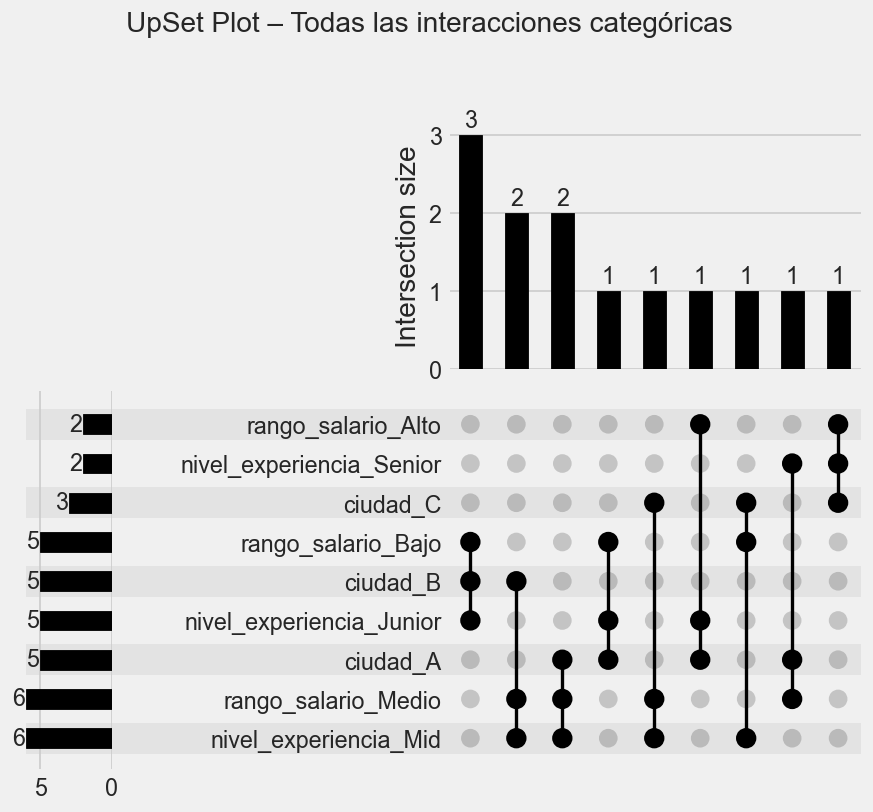

In [46]:

categorical_cols = ['ciudad', 'nivel_experiencia', 'rango_salario']
df_dummies = pd.get_dummies(df[categorical_cols])

upset_data = from_indicators(df_dummies.columns, df_dummies)

# Graficar UpSet
upset = UpSet(upset_data, show_counts=True, sort_by='cardinality')
upset.plot()
plt.suptitle("UpSet Plot – Todas las interacciones categóricas", y=1.02)
plt.show()

### cBioPortal
cBioPortal es una plataforma abierta (MSKCC) para explorar, visualizar y descargar datos de oncogenómica clínica de cientos de estudios (TCGA, ICGC, pediátricos, ensayos, etc.). 
Este permite:
- Explorar mutaciones, CNAs, expresión, fusiones y datos clínicos (edad, sexo, estadio, subtipos, supervivencia).
- Visualizar rápidamente con OncoPrint, gráficos de mutua exclusión/co-ocurrencia y supervivencia (KM).
- Descargar tablas listas para análisis (MAF, clínicos de paciente y muestra).


In [47]:
# Si falta:
# %pip install requests pandas

import requests

# Para descargar datos de cBioPortal
BASE = "https://www.cbioportal.org/api"
HEADERS = {"accept": "application/json"}

def api_get(path, **params):
    r = requests.get(f"{BASE}{path}", params=params, headers=HEADERS)
    r.raise_for_status()
    return r.json()

def api_post(path, payload, **params):
    h = {**HEADERS, "Content-Type": "application/json"}
    r = requests.post(f"{BASE}{path}", params=params, json=payload, headers=h)
    r.raise_for_status()
    return r.json()

# catastro de estudios (resumen)
studies = pd.DataFrame(api_get("/studies", projection="SUMMARY"))

# filtra por palabra clave en 'name' o por 'cancerTypeId'
def buscar_estudios(texto, df=studies):
    m = df[
        df["name"].str.contains(texto, case=False, na=False) |
        df["studyId"].str.contains(texto, case=False, na=False) |
        df["cancerTypeId"].str.contains(texto, case=False, na=False)
    ][["studyId","name","cancerTypeId"]].sort_values("studyId")
    return m

# ejemplos de búsqueda: con cancér de mama
display(buscar_estudios("TCGA").head(20))
display(buscar_estudios("breast|brca|mama"))

,studyId,name,cancerTypeId
197,acc_tcga,"Adrenocortical Carcinoma (TCGA, Firehose Legacy)",acc
496,acc_tcga_gdc,"Adrenocortical Carcinoma (TCGA GDC, 2025)",acc
187,acc_tcga_pan_can_atlas_2018,"Adrenocortical Carcinoma (TCGA, PanCancer Atlas)",acc
495,aml_tcga_gdc,"Acute Myeloid Leukemia (TCGA GDC, 2025)",aml
93,blca_msk_tcga_2020,"Bladder Cancer (MSK/TCGA, 2020)",blca
198,blca_tcga,"Bladder Urothelial Carcinoma (TCGA, Firehose L...",blca
447,blca_tcga_gdc,"Bladder Urothelial Carcinoma (TCGA, GDC)",blca
91,blca_tcga_pan_can_atlas_2018,"Bladder Urothelial Carcinoma (TCGA, PanCancer ...",blca
89,blca_tcga_pub,"Bladder Urothelial Carcinoma (TCGA, Nature 2014)",blca
226,blca_tcga_pub_2017,"Bladder Cancer (TCGA, Cell 2017)",blca


,studyId,name,cancerTypeId
90,acbc_mskcc_2015,"Adenoid Cystic Carcinoma of the Breast (MSK, J...",acbc
213,bfn_duke_nus_2015,"Breast Fibroepithelial Tumors (Duke-NUS, Nat G...",bfn
440,brca_aurora_2023,"Metastatic Breast Cancer (AURORA US Network, N...",brca
223,brca_bccrc,"Breast Invasive Carcinoma (British Columbia, N...",brca
221,brca_bccrc_xenograft_2014,"Breast Cancer Xenografts (British Columbia, Na...",brca
222,brca_broad,"Breast Invasive Carcinoma (Broad, Nature 2012)",brca
230,brca_cptac_2020,Proteogenomic landscape of breast cancer (CPTA...,brca
232,brca_dfci_2020,"Metastatic Breast Cancer (DFCI, Cancer Discov ...",brca
194,brca_fuscc_2020,"Triple-Negative Breast Cancer (FUSCC, Cell Res...",brca
231,brca_hta9_htan_2022,"Breast Cancer (HTAN, 2022)",brca


In [48]:
# Elegir estudio de interes por el ID
study_id = "breast_msk_2025"
print("Elegido:", study_id)

Elegido: breast_msk_2025


In [49]:
# Primero listamos los atributos clínicos definidos a nivel paciente (también puedes usar entityType="SAMPLE" para nivel muestra):
attrs_pat = pd.DataFrame(
    api_get(f"/studies/{study_id}/clinical-attributes", entityType="PATIENT")
)
display(attrs_pat.head(15))

# mira sólo los IDs de atributo:
attrs_pat_ids = set(attrs_pat["clinicalAttributeId"])
print(list(sorted(attrs_pat_ids))[:25])


,displayName,description,datatype,patientAttribute,priority,clinicalAttributeId,studyId
0,Cancer Type,The main cancer type as defined by the Oncotre...,STRING,False,3000,CANCER_TYPE,breast_msk_2025
1,Cancer Type Detailed,The cancer subtype as defined by the Oncotree ...,STRING,False,2000,CANCER_TYPE_DETAILED,breast_msk_2025
2,Ethnicity,Ethnicity,STRING,True,950,ETHNICITY,breast_msk_2025
3,Fraction Genome Altered,Fraction Genome Altered,NUMBER,False,20,FRACTION_GENOME_ALTERED,breast_msk_2025
4,Sex,Sex,STRING,True,970,GENDER,breast_msk_2025
5,Gene Panel,The gene panel or assay used used to perform t...,STRING,False,900,GENE_PANEL,breast_msk_2025
6,Metastatic Site,Location of profiled metastatic site,STRING,False,0,METASTATIC_SITE,breast_msk_2025
7,MSI Comment,MSI interpretation. Source: MPath,STRING,False,0,MSI_COMMENT,breast_msk_2025
8,MSI Score,Microsatellite Instability (MSI) score. Source...,NUMBER,False,0,MSI_SCORE,breast_msk_2025
9,MSI Type,Directly related to MSI Score; Possible values...,STRING,False,910,MSI_TYPE,breast_msk_2025


['CANCER_TYPE', 'CANCER_TYPE_DETAILED', 'ETHNICITY', 'FRACTION_GENOME_ALTERED', 'GENDER', 'GENE_PANEL', 'METASTATIC_SITE', 'MSI_COMMENT', 'MSI_SCORE', 'MSI_TYPE', 'MUTATION_COUNT', 'ONCOTREE_CODE', 'OS_MONTHS', 'OS_STATUS', 'PRIMARY_SITE', 'RACE', 'SAMPLE_CLASS', 'SAMPLE_COUNT', 'SAMPLE_COVERAGE', 'SAMPLE_TYPE', 'SOMATIC_STATUS', 'TUMOR_PURITY']


In [50]:
# Lista de pacientes
patients = pd.DataFrame(api_get(f"/studies/{study_id}/patients", projection="SUMMARY"))
patient_ids = patients["patientId"].tolist()
print(f"Pacientes: {len(patient_ids)}")

Pacientes: 3116


In [51]:
# Pedimos clínica básica a nivel PACIENTE 
attrs = ["OS_MONTHS", "OS_STATUS", "GENDER", "ETHNICITY"]

raw = pd.DataFrame(api_post(
    f"/studies/{study_id}/clinical-data/fetch",
    {"ids": patient_ids, "attributeIds": attrs},
    clinicalDataType="PATIENT",
    projection="DETAILED"
))

# ID puede llamarse patientId o entityId según el endpoint
id_col = "patientId" if "patientId" in raw.columns else "entityId"

# Una fila por paciente
wide = (raw[raw["clinicalAttributeId"].isin(attrs)]
          [[id_col, "clinicalAttributeId", "value"]]
          .pivot_table(index=id_col, columns="clinicalAttributeId", values="value", aggfunc="first"))

# Limpiar tipos y crear evento
wide["OS_MONTHS"] = pd.to_numeric(wide.get("OS_MONTHS"), errors="coerce")
wide["OS_EVENT"]  = wide.get("OS_STATUS").astype(str).str.contains("DECEASED", case=False, na=False)

# Vista rápida
wide[["OS_MONTHS","OS_STATUS","OS_EVENT","GENDER","ETHNICITY"]].head()


clinicalAttributeId,OS_MONTHS,OS_STATUS,OS_EVENT,GENDER,ETHNICITY
patientId,,,,,
P-0000004,3.55,1:DECEASED,True,FEMALE,Non-Spanish; Non-Hispanic
P-0000012,132.66,0:LIVING,False,Female,Non-Spanish; Non-Hispanic
P-0000015,13.68,1:DECEASED,True,FEMALE,Non-Spanish; Non-Hispanic
P-0000041,13.31,1:DECEASED,True,FEMALE,Non-Spanish; Non-Hispanic
P-0000057,29.16,1:DECEASED,True,FEMALE,Non-Spanish; Non-Hispanic


In [52]:
# Resumen de los datos
n_total      = len(patient_ids)
n_con_os     = int(wide["OS_MONTHS"].notna().sum())
mediana_os   = float(wide["OS_MONTHS"].median()) if n_con_os > 0 else None
tasa_evento  = float(wide["OS_EVENT"].mean()) if "OS_EVENT" in wide else None

resumen = {
    "n_pacientes": n_total,
    "con_OS": n_con_os,
    "mediana_OS_meses": mediana_os,
    "tasa_evento": tasa_evento
}
resumen

{'n_pacientes': 3116,
 'con_OS': 3109,
 'mediana_OS_meses': 39.35299339,
 'tasa_evento': 0.5285622593068036}

In [53]:
# Estadísticos básicos de OS (count, mean, std, min, Q1, mediana, Q3, max)
wide[["OS_MONTHS"]].describe()

clinicalAttributeId,OS_MONTHS
count,"3,109.00"
mean,45.29
std,34.52
min,0.00
25%,13.51
50%,39.35
75%,74.60
max,132.66


In [54]:
# Frecuencia de sexo
wide["GENDER"].value_counts(dropna=False)
(wide["GENDER"].value_counts(normalize=True, dropna=False) * 100).round(1)

# Estadísticos de OS por sexo 
wide.dropna(subset=["OS_MONTHS"]).groupby("GENDER")["OS_MONTHS"].describe()


,count,mean,std,min,25%,50%,75%,max
GENDER,,,,,,,,
FEMALE,"1,984.00",36.42,31.97,0.00,9.21,25.78,62.33,130.22
Female,"1,096.00",61.57,33.14,0.00,33.31,66.72,88.88,132.66
MALE,15.00,42.43,34.23,7.27,19.27,27.62,50.47,124.90
Male,14.00,32.02,24.89,0.00,11.76,28.75,48.64,81.93


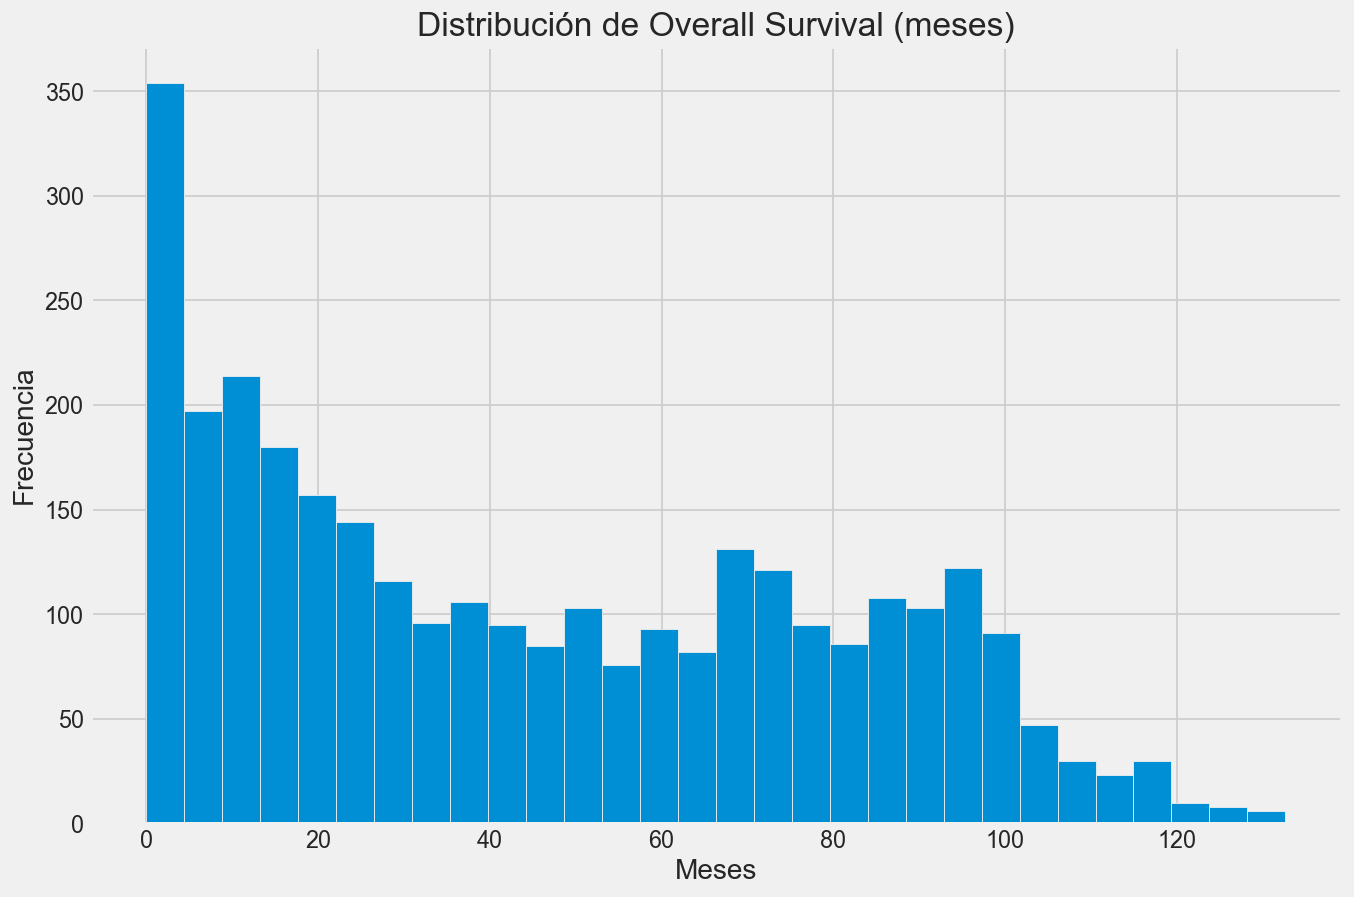

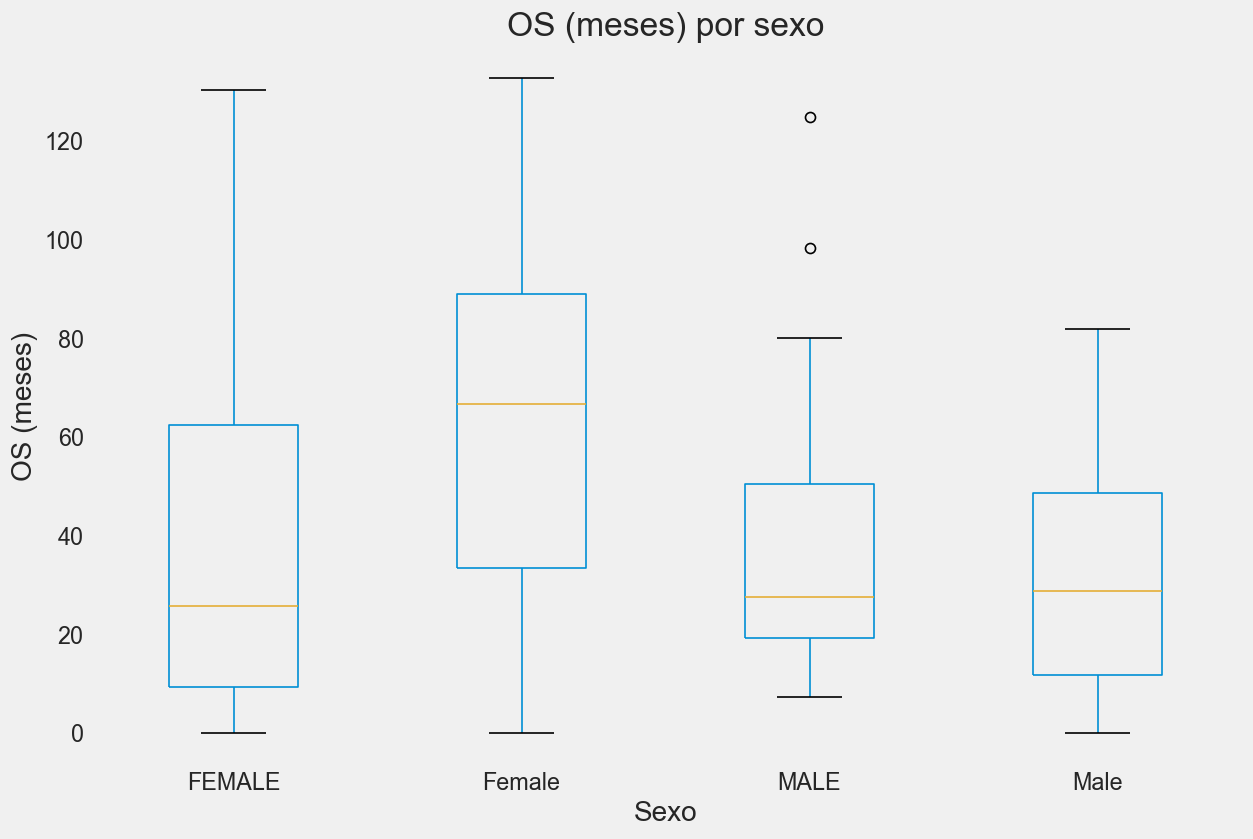

In [55]:
# Histograma de OS: supervivencia global 

wide["OS_MONTHS"].dropna().plot(kind="hist", bins=30)
plt.title("Distribución de Overall Survival (meses)")
plt.xlabel("Meses"); plt.ylabel("Frecuencia")
plt.show()

# Boxplot de OS por sexo
ok = wide.dropna(subset=["OS_MONTHS","GENDER"])
ok.boxplot(column="OS_MONTHS", by="GENDER", grid=False)
plt.title("OS (meses) por sexo"); plt.suptitle("")
plt.xlabel("Sexo"); plt.ylabel("OS (meses)")
plt.show()


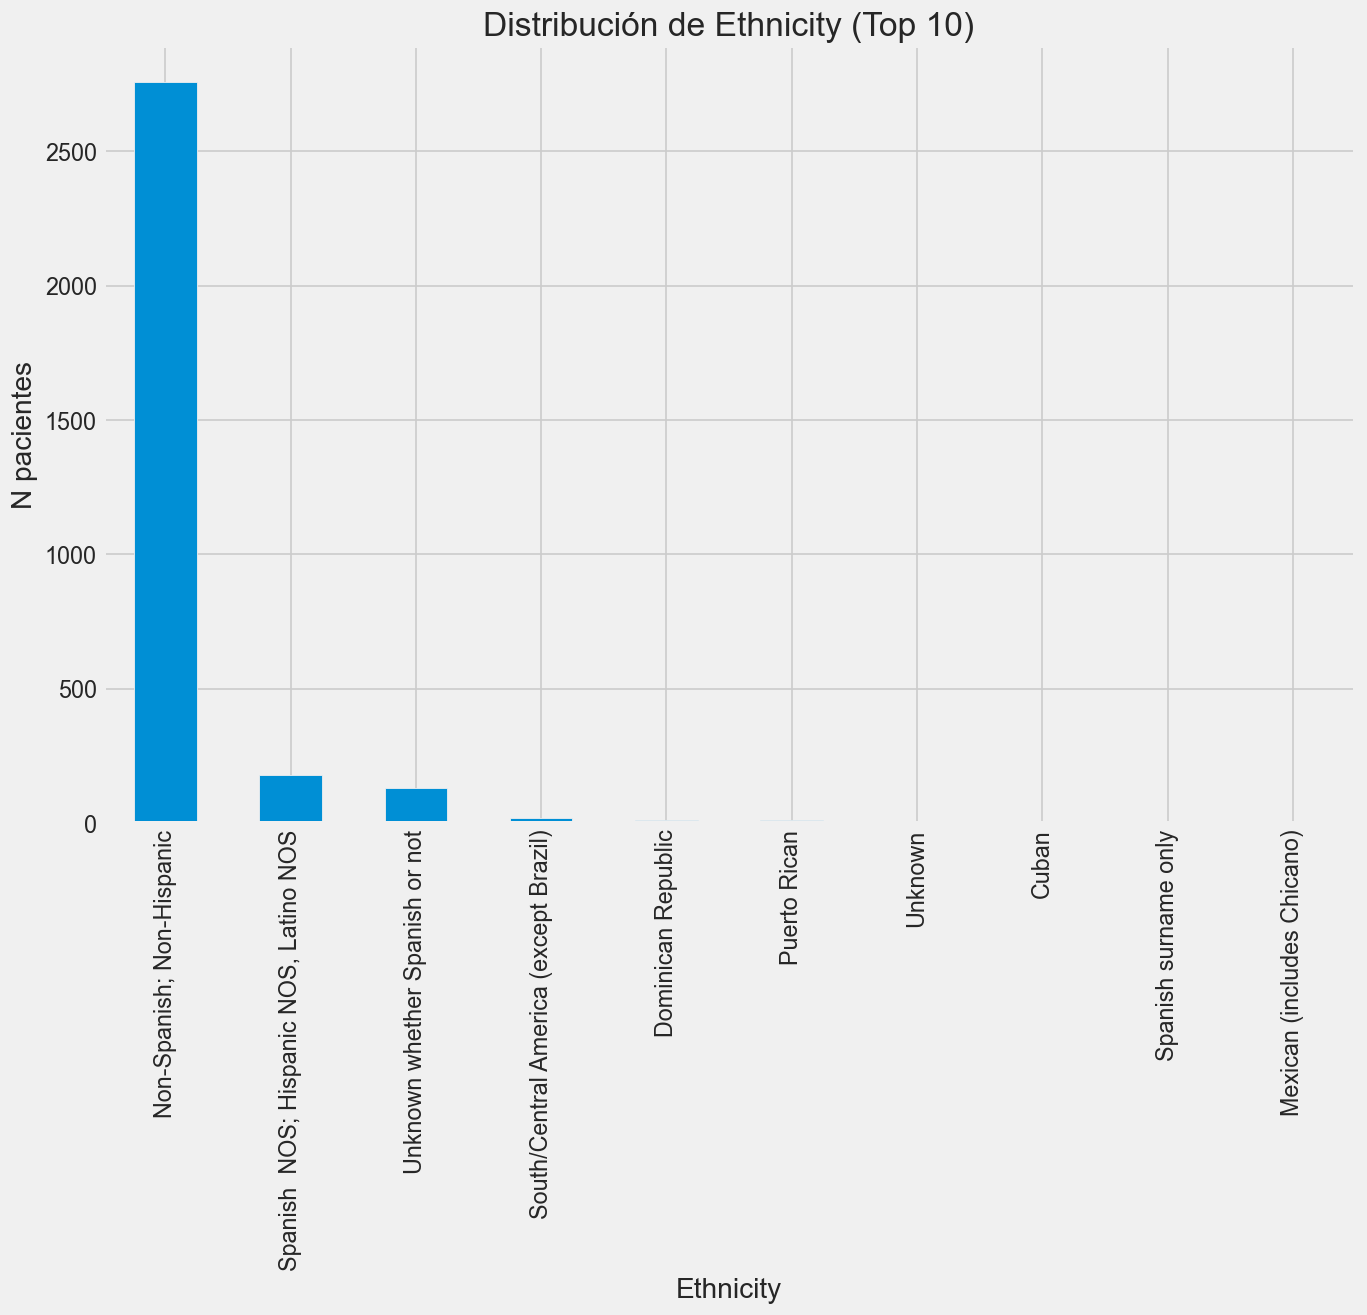

In [56]:
# Barras de ETHNICITY
if "ETHNICITY" in wide:
    wide["ETHNICITY"].dropna().value_counts().head(10).plot(kind="bar")
    plt.title("Distribución de Ethnicity (Top 10)")
    plt.xlabel("Ethnicity")
    plt.ylabel("N pacientes")
    plt.show()


In [57]:
## Mensaje final del tutorial
print("¡Felicidades! Has completado el tutorial de preparación de datos.")
print("Ahora tienes un conjunto de datos limpio y transformado, listo para ser utilizado en el modelado de Machine Learning o para un análisis más profundo.")

¡Felicidades! Has completado el tutorial de preparación de datos.
Ahora tienes un conjunto de datos limpio y transformado, listo para ser utilizado en el modelado de Machine Learning o para un análisis más profundo.
